# <font style="color:blue">Project 3: Object Detection</font>


#### Maximum Points: 100

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Plot Ground Truth Bounding Boxes</h3></td> <td><h3>20</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Training</h3></td> <td><h3>25</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Inference</h3></td> <td><h3>15</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>COCO Detection Evaluation</h3></td> <td><h3>25</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Run Inference on a Video</h3></td> <td><h3>15</h3></td> </tr>
    </table>
</div>


# <font style="color:purple">Download the Dataset</font> 

**[Download the Vehicle registration plate](https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1)**


Download the Vehicle Registration Plate dataset from [here](https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1) and unzip it. 

We will have the following directory structure:

```
Dataset
├── train
│   └── Vehicle registration plate
│       └── Label
└── validation
    └── Vehicle registration plate
        └── Label
```

Unzipping the file will give you a directory `Dataset`. This directory has two folder `train` and `validation`. Each train and validation folder has `Vehicle registration plate`  folder with `.jpg` images and a folder `Labels`.  `Labels` folder has bounding box data for the images.


For example,
For image: `Dataset/train/Vehicle registration plate/bf4689922cdfd532.jpg`
Label file is  `Dataset/train/Vehicle registration plate/Label/bf4689922cdfd532.txt`

There are one or more lines in each `.txt` file. Each line represents one bounding box.
For example,
```
Vehicle registration plate 385.28 445.15 618.24 514.225
Vehicle registration plate 839.68 266.066462 874.24 289.091462
```

We have a single class detection (`Vehicle registration plate detection`) problem. So bounding box details start from the fourth column in each row.

Representation is in `xmin`, `ymin`, `xmax`, and `ymax` format.

**It has `5308` training and `386` validation dataset.**

Data is downloaded from [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)

#  <font style="color:green">1. Plot Ground Truth Bounding Boxes [20 Points]</font> 

**You have to show three images from validation data with the bounding boxes.**

The plotted images should be similar to the following:

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g1.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g2.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g3.png'>



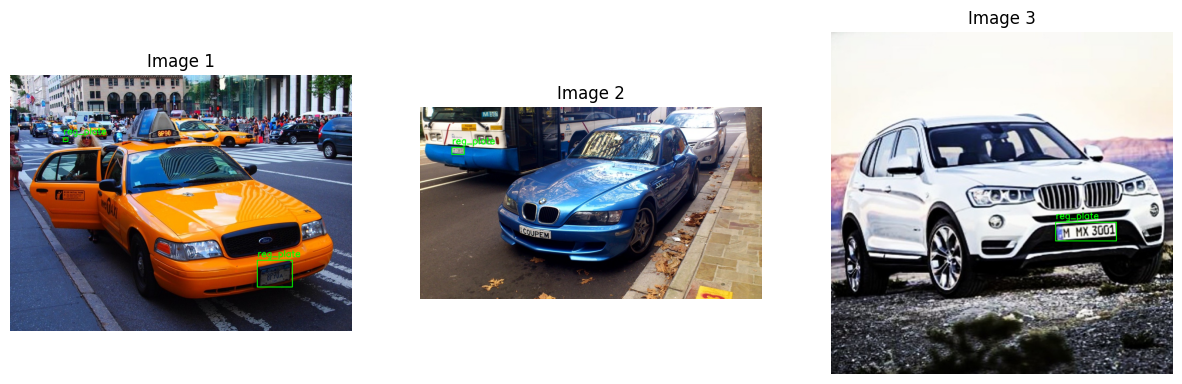

In [1]:
import os
import glob
import cv2
import matplotlib.pyplot as plt

# Function to read and process each label file
def read_label_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        boxes = []
        for line in lines:
            parts = line.strip().split()
            x_min = float(parts[3])
            y_min = float(parts[4])
            x_max = float(parts[5])
            y_max = float(parts[6])
            boxes.append((x_min, y_min, x_max, y_max))
    return boxes

# Function to draw bounding boxes on an image
def draw_bounding_boxes(image_path, boxes):
    image = cv2.imread(image_path)
    label='reg_plate'
    for (x_min, y_min, x_max, y_max) in boxes:
        cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
        cv2.putText(image, label, (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    return image

# Paths to the validation directories
validation_dir = '/kaggle/input/object-dectection-num-plate/Dataset/validation/Vehicle registration plate'
label_dir = os.path.join(validation_dir, 'Label')

# Get a list of all image files and their corresponding label files
image_files = glob.glob(os.path.join(validation_dir, '*.jpg'))
label_files = [os.path.join(label_dir, os.path.basename(f).replace('.jpg', '.txt')) for f in image_files]

# Display three images with bounding boxes
plt.figure(figsize=(15, 10))
for i in range(3):
    image_path = image_files[i]
    label_path = label_files[i]
    boxes = read_label_file(label_path)
    image_with_boxes = draw_bounding_boxes(image_path, boxes)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.show()


In [2]:
import os
import shutil

def copy_files(src_dir, dst_dir):
    # Create the destination directory if it doesn't exist
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    # Walk through the source directory
    for root, dirs, files in os.walk(src_dir):
        for dir_name in dirs:
            src_subdir = os.path.join(root, dir_name)
            dst_subdir = os.path.join(dst_dir, dir_name)
            shutil.copytree(src_subdir, dst_subdir)

# Specify your source and destination directories
src_dataset_dir = '/kaggle/input/object-dectection-num-plate/Dataset'  # Replace with your actual dataset path
dst_copy_dir = '/kaggle/working/datatset'  # Replace with your desired copy destination

# Copy the dataset without label folders
copy_files(os.path.join(src_dataset_dir, 'train'), os.path.join(dst_copy_dir, 'train'))
copy_files(os.path.join(src_dataset_dir, 'validation'), os.path.join(dst_copy_dir, 'validation'))

print("Dataset copied")


Dataset copied


In [3]:
import os
import glob
import cv2

# Function to read and process each label file
def read_label_file(file_path, image_width, image_height):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        boxes = []
        for line in lines:
            parts = line.strip().split()
            x_min = float(parts[3])
            y_min = float(parts[4])
            x_max = float(parts[5])
            y_max = float(parts[6])

            x_center = ((x_min + x_max) / 2) / image_width
            y_center = ((y_min + y_max) / 2) / image_height
            width = (x_max - x_min) / image_width
            height = (y_max - y_min) / image_height

            boxes.append(f"0 {x_center} {y_center} {width} {height}")
    return boxes

# Paths to the directories
train_images_dir = '/kaggle/working/datatset/train/Vehicle registration plate'
train_labels_dir = '/kaggle/input/object-dectection-num-plate/Dataset/train/Vehicle registration plate/Label'

# Get a list of all image files and their corresponding label files
image_files = glob.glob(os.path.join(train_images_dir, '*.jpg'))
label_files = [os.path.join(train_labels_dir, os.path.basename(f).replace('.jpg', '.txt')) for f in image_files]

for i in range(len(image_files)):
    image_path = image_files[i]
    label_path = label_files[i]
    
    # Get image dimensions
    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape

    # Create the output directory if it doesn't exist
    output_dir = "/kaggle/working/datatset/train/Vehicle registration plate"
    os.makedirs(output_dir, exist_ok=True)

    # Create the output label file path
    output_label_path = os.path.join(output_dir, os.path.basename(label_path))
    
    boxes = read_label_file(label_path, image_width, image_height)
    
    with open(output_label_path, 'w') as f:
        for box in boxes:
            f.write(box + '\n')

In [4]:
# Paths to the directories
val_images_dir = '/kaggle/working/datatset/validation/Vehicle registration plate'
val_labels_dir = '/kaggle/input/object-dectection-num-plate/Dataset/validation/Vehicle registration plate/Label'

# Get a list of all image files and their corresponding label files
image_files = glob.glob(os.path.join(val_images_dir, '*.jpg'))
label_files = [os.path.join(val_labels_dir, os.path.basename(f).replace('.jpg', '.txt')) for f in image_files]

for i in range(len(image_files)):
    image_path = image_files[i]
    label_path = label_files[i]
    
    # Get image dimensions
    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape

    # Create the output directory if it doesn't exist
    output_dir = "/kaggle/working/datatset/validation/Vehicle registration plate"
    os.makedirs(output_dir, exist_ok=True)

    # Create the output label file path
    output_label_path = os.path.join(output_dir, os.path.basename(label_path))
    
    boxes = read_label_file(label_path, image_width, image_height)
    
    with open(output_label_path, 'w') as f:
        for box in boxes:
            
            f.write(box + '\n')

In [7]:
import os
import glob

def read_and_print_labels(folder_path):
  """
  Reads and prints the contents of all label files in the specified folder.

  Args:
    folder_path: The path to the folder containing the label files.
  """
  for filename in glob.glob(os.path.join(folder_path, '*.txt')):
    with open(filename, 'r') as f:
        print(f'Filename: {filename}')
        print(f.read())

# Example usage:
folder_path = '/kaggle/working/datatset/train/Vehicle registration plate'
read_and_print_labels(folder_path)
folder_path = '/kaggle/working/datatset/validation/Vehicle registration plate'
read_and_print_labels(folder_path)

Filename: /kaggle/working/datatset/train/Vehicle registration plate/29f72d155f2c033b.txt
0 0.134375 0.37250000000000005 0.03125 0.024999999999999984
0 0.289375 0.405 0.02124999999999999 0.009999999999999934
0 0.546875 0.4541664999999999 0.043749999999999956 0.031667000000000035
0 0.778125 0.3641665 0.02124999999999999 0.018333000000000006

Filename: /kaggle/working/datatset/train/Vehicle registration plate/c0261737a26537f1.txt
0 0.23781249999999998 0.8147279999999999 0.02562499999999998 0.01594800000000012
0 0.528125 0.9113510000000001 0.04500000000000004 0.023451999999999928

Filename: /kaggle/working/datatset/train/Vehicle registration plate/607f7ec0e247b512.txt
0 0.955 0.49208349999999995 0.030000000000000027 0.015832999999999986

Filename: /kaggle/working/datatset/train/Vehicle registration plate/2497453a827db1f6.txt
0 0.7828125 0.5215255 0.12062499999999998 0.10086100000000002

Filename: /kaggle/working/datatset/train/Vehicle registration plate/234ae2b7bf7027a8.txt
0 0.49156249999

In [6]:
import os
import json
from PIL import Image

def yolo_to_coco_bbox(bbox, img_width, img_height):
    """Convert YOLO bbox format to COCO format."""
    x_center, y_center, width, height = bbox
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    x_min = x_center - (width / 2)
    y_min = y_center - (height / 2)
    return [x_min, y_min, width, height]

def convert_txt_to_coco(image_dir, label_dir, output_json, category_mapping):
    """Convert YOLO txt annotations to COCO format."""
    coco_format = {
        "images": [],
        "annotations": [],
        "categories": []
    }

    annotation_id = 1
    image_id = 1

    # Load the images and label files
    for txt_file in os.listdir(label_dir):
        if txt_file.endswith(".txt"):
            image_file = txt_file.replace(".txt", ".jpg")  # Assuming images are in JPG format
            image_path = os.path.join(image_dir, image_file)

            # Get image dimensions
            img = Image.open(image_path)
            img_width, img_height = img.size

            # Add image metadata to COCO format
            coco_format["images"].append({
                "id": image_id,
                "file_name": image_file,
                "width": img_width,
                "height": img_height
            })

            # Read corresponding label file
            with open(os.path.join(label_dir, txt_file), 'r') as f:
                lines = f.readlines()
                for line in lines:
                    class_id, x_center, y_center, width, height = map(float, line.strip().split())
                    bbox = yolo_to_coco_bbox([x_center, y_center, width, height], img_width, img_height)

                    # Add annotation to COCO format
                    coco_format["annotations"].append({
                        "id": annotation_id,
                        "image_id": image_id,
                        "category_id": int(class_id) + 1,  # COCO category IDs start at 1
                        "bbox": bbox,
                        "area": bbox[2] * bbox[3],  # width * height
                        "iscrowd": 0
                    })
                    annotation_id += 1

            image_id += 1

    # Add categories to COCO format
    for category_id, category_name in category_mapping.items():
        coco_format["categories"].append({
            "id": category_id + 1,  # COCO category IDs start at 1
            "name": category_name
        })

    # Save the COCO formatted annotations to a JSON file
    with open(output_json, 'w') as json_file:
        json.dump(coco_format, json_file, indent=4)

# Example usage:
category_mapping = {0: "reg plate"}  # Add your own class names here
convert_txt_to_coco('/kaggle/working/datatset/validation/Vehicle registration plate', '/kaggle/working/datatset/validation/Vehicle registration plate', '/kaggle/working/validate_gt.json', category_mapping)



#  <font style="color:green">2. Training [25 Points]</font> 

- **Write your training code in this section.**

- **You also have to share ([shared logs example](https://tensorboard.dev/experiment/JRtnsKbwTaq1ow6nPLPGeg)) the loss plot of your training using tensorboard.dev.** 

How to share TensorBoard logs using tensorboard.dev find [here](https://courses.opencv.org/courses/course-v1:OpenCV+OpenCV-106+2019_T1/courseware/b1c43ffe765246658e537109e188addb/d62572ec8bd344db9aeae81235ede618/4?activate_block_id=block-v1%3AOpenCV%2BOpenCV-106%2B2019_T1%2Btype%40vertical%2Bblock%40398b46ddcd5c465fa52cb4d572ba3229).

In [8]:
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16965, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 16965 (delta 82), reused 103 (delta 50), pack-reused 16805 (from 1)
Receiving objects: 100% (16965/16965), 15.71 MiB | 28.77 MiB/s, done.
Resolving deltas: 100% (11620/11620), done.


In [9]:
%cd yolov5/
!pwd
!pip install -r requirements.txt

/kaggle/working/yolov5
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 22.1 MB/s eta 0:00:0000:01


In [11]:
%%writefile data.yaml
path: '/kaggle/working/datatset' # dataset root dir
train: '/kaggle/working/datatset/train/Vehicle registration plate'
val: '/kaggle/working/datatset/validation/Vehicle registration plate'
nc: 1
names: ['reg plate']

Overwriting data.yaml


In [12]:
!python train.py --data data.yaml --weights yolov5m.pt --img 640 --epochs {60} --batch-size 16

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5m.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=Non

In [13]:
!python /kaggle/working/yolov5/detect.py --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /kaggle/working/datatset/validation/Vehicle\ registration\ plate --save-txt --save-conf

detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/working/datatset/validation/Vehicle registration plate, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/386 /kaggle/working/datatset/validation/Vehicle registration plate/003a5aaf6d17c917.jpg: 448x640 1 reg plate, 36.8ms
image 2/386 /kaggle/working/datatset/validation/Vehicle registration plate/00723dac8201a83e.jpg: 480x640 2 reg plates,

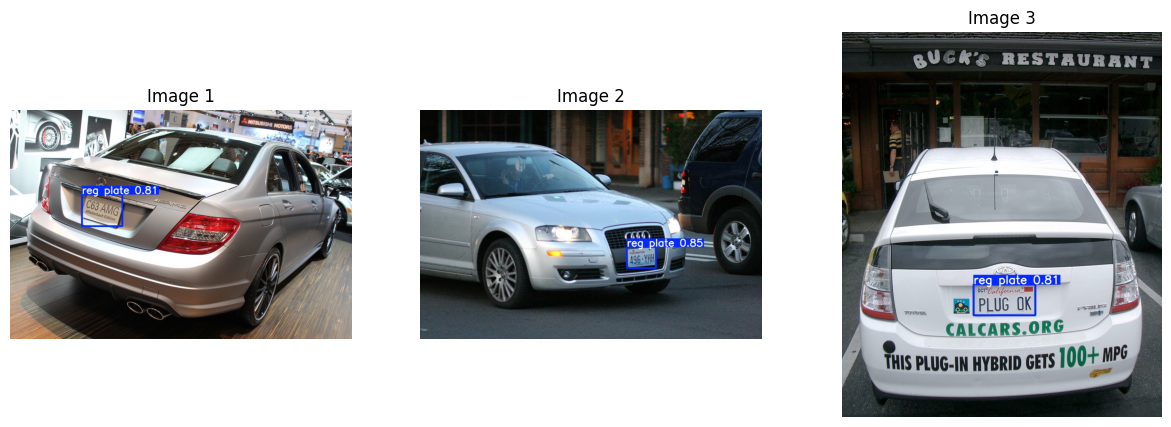

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Assuming your predicted images are in the following directory
image_dir = "runs/detect/exp" 

# List of image file names (replace with your actual image names)
image_files = ["003a5aaf6d17c917.jpg", "fa9147596edc058f.jpg", "ff85b09876d61631.jpg"]

# Create a figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate through the images and display them
for i, file in enumerate(image_files):
    image_path = os.path.join(image_dir, file)
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(f"Image {i+1}")

# Show the plot
plt.show()

In [ ]:
!python val.py --task 'val' --weights runs/train/exp/weights/best.pt --data data.yaml

In [16]:
!python val.py --data data.yaml --weights runs/train/exp/weights/best.pt --img 640 --batch-size 32 --save-txt --save-conf --save-json


val: data=data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=True, save_json=True, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning /kaggle/working/datatset/validation/Vehicle registration plate.cac
                 Class     Images  Instances          P          R      mAP50   
                   all        386        512      0.926      0.899      0.943      0.665
Speed: 0.1ms pre-process, 6.4ms inference, 1.7ms NMS per image at shape (32, 3, 640, 640)

Evaluating pycocotools mAP... saving runs/val/exp/best_predictions.json...
requirements: Ultralytics requirement ['pycocotoo

#  <font style="color:green">3. Inference [15 Points]</font> 

**You have to make predictions from your trained model on three images from the validation dataset.**

The plotted images should be similar to the following:

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p1.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p2.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p3.png'>




In [20]:
import os
import json
from PIL import Image

def yolo_to_coco_bbox(bbox, img_width, img_height):
    """Convert YOLO bbox format to COCO format."""
    x_center, y_center, width, height = bbox
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    x_min = x_center - (width / 2)
    y_min = y_center - (height / 2)
    return [x_min, y_min, width, height]

def convert_txt_to_coco_detections(image_dir, detection_dir, output_json):
    """Convert YOLO txt detection results to COCO format."""
    coco_format = []

    image_id = 1  # COCO expects a unique ID for each image

    for txt_file in os.listdir(detection_dir):
        if txt_file.endswith(".txt"):
            image_file = txt_file.replace(".txt", ".jpg")  # Assuming images are in JPG format
            image_path = os.path.join(image_dir, image_file)

            # Get image dimensions
            img = Image.open(image_path)
            img_width, img_height = img.size

            # Read the detection label file
            with open(os.path.join(detection_dir, txt_file), 'r') as f:
                lines = f.readlines()
                for line in lines:
                    class_id, x_center, y_center, width, height, confidence = map(float, line.strip().split())
                    bbox = yolo_to_coco_bbox([x_center, y_center, width, height], img_width, img_height)

                    # Add detection result to COCO format
                    coco_format.append({
                        "image_id": image_id,
                        "category_id": int(class_id) + 1,  # COCO category IDs start at 1
                        "bbox": bbox,
                        "score": confidence  # Confidence score for each detection
                    })

            image_id += 1

    # Save COCO format detection results to a JSON file
    with open(output_json, 'w') as json_file:
        json.dump(coco_format, json_file, indent=4)

# Example usage:
convert_txt_to_coco_detections('/kaggle/working/datatset/validation/Vehicle registration plate', '/kaggle/working/yolov5/runs/detect/exp/labels', '/kaggle/working/detections_coco.json')


In [1]:
!pip install pycocotools


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 6.7 MB/s eta 0:00:00a 0:00:01


In [2]:
from pycocotools.cocoeval import COCOeval
from pycocotools.coco import COCO

# Load your ground truth annotations (JSON file)
annFile = '/kaggle/working/validate_gt.json'
cocoGt = COCO(annFile)


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
print(cocoGt)

In [10]:
cocoDt = cocoGt.loadRes('/kaggle/working/detections_coco.json')  # Detection results

# Initialize COCOeval object
E = COCOeval(cocoGt, cocoDt, 'bbox')

# Set IoU thresholds if needed (optional)
E.params.recThrs = [0.5, 0.75]  # Example: IoU 0.5 and 0.75 thresholds

# Run evaluation
E.evaluate()
E.accumulate()
E.summarize()


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.156
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.181
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.181
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

In [6]:
E = COCOeval(cocoGt, cocoDt)

In [7]:
E.params.recThrs = [0.5, 0.75]  # Set IoU thresholds
E.evaluate()
E.accumulate()
E.summarize()


Running per image evaluation...
Evaluate annotation type *segm*


AttributeError: 'str' object has no attribute 'loadAnns'

#  <font style="color:green">4. COCO Detection Evaluation [25 Points]</font> 

**You have to evaluate your detection model on COCO detection evaluation metric.**

For your reference here is the coco evaluation metric chart:


---

<img src="https://www.learnopencv.com/wp-content/uploads/2020/03/c3-w9-coco_metric.png">

---

#### <font style="color:red">The expected `AP` (primary challenge metric) is more than `0.5`.</font>

**The expected output should look similar to the following:**

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.550
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.886
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.629
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.653
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.627
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.504
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.629
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.633
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.380
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.722
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.704
```



In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
def get_iou(predicted_dbox, ground_truth_dboxes):
    """
        Calculates IoU (Jaccard index) of two detection boxes:
            predicted_dbox ∩ ground_truth_dbox / (area(predicted_dbox) +
            area(ground_truth_dbox) - predicted_dbox ∩ ground_truth_dbox)

        Parameters:
            Coordinates of detection boxes are supposed to be in the following form: [x1, y1, x2, y2]
            predicted_dbox: [tensor] predicted detection boxes
            ground_truth_dboxes: [tensor] ground truth detection boxes

        Return value:
            overlap area
    """
    
    ixmin = torch.max(ground_truth_dboxes[:, 0], predicted_dbox[0])
    iymin = torch.max(ground_truth_dboxes[:, 1], predicted_dbox[1])
    ixmax = torch.min(ground_truth_dboxes[:, 2], predicted_dbox[2])
    iymax = torch.min(ground_truth_dboxes[:, 3], predicted_dbox[3])
    # except:
    # print('GT:', ground_truth_dboxes)
    # print('PR:', predicted_dbox)
    # raise

    width = torch.max(ixmax - ixmin + 1., torch.tensor(0.))
    height = torch.max(iymax - iymin + 1., torch.tensor(0.))
    intersection_area = width * height

    union = ((predicted_dbox[2] - predicted_dbox[0] + 1.) * (predicted_dbox[3] - predicted_dbox[1] + 1.) +
             (ground_truth_dboxes[:, 2] - ground_truth_dboxes[:, 0] + 1.) *
             (ground_truth_dboxes[:, 3] - ground_truth_dboxes[:, 1] + 1.) - intersection_area)

    return intersection_area / union

In [ ]:
def check_iou_threshold(predicted_dboxes, ground_truth_dboxes, intersection_threshold):
    """
        Get the predictions with an appropriate IoU area for further true positives computations

        Parameters:
        predicted_dboxes: predicted by the detector detection boxes
        ground_truth_dboxes: ground truth
        intersection_threshold: IoU threshold

        Return value:
            tensor with the following values:
                    True - if the IoU passed defined threshold
                    False - if the IoU did not pass defined threshold
            index of the maximum IoU value
    """
    intersection_over_union = get_iou(predicted_dboxes, ground_truth_dboxes)
    return torch.max(intersection_over_union) >= intersection_threshold, torch.argmax(intersection_over_union)

In [ ]:
def match(sorted_ind, predicted_dboxes, ground_truth_dboxes, intersection_threshold):
    
    true_positives = torch.zeros((len(sorted_ind)), dtype=torch.float64)
    false_positives = torch.zeros((len(sorted_ind)), dtype=torch.float64)
    is_obj_already_detected = [False for _ in range(ground_truth_dboxes.shape[0])]

    for box_num in range(len(sorted_ind)):
        predicted_dbox = predicted_dboxes[box_num, :]

        is_pass_threshold, max_iou_index = check_iou_threshold(
            predicted_dbox, ground_truth_dboxes, intersection_threshold
        )
        
        if is_pass_threshold and not is_obj_already_detected[max_iou_index]:
            true_positives[box_num] = 1
            is_obj_already_detected[max_iou_index] = True
        else:
            false_positives[box_num] = 1

    return true_positives, false_positives

In [ ]:
class AveragePrecisionEvaluator:
    def __init__(self, intersection_threshold=0.5, points_number=11):
        self.recall_levels = torch.linspace(0, 1, points_number)
        self.intersection_threshold = intersection_threshold
        self.recalls = None
        self.precisions = None
        self.average_precision = 0.
        self.true_positives = None
        self.false_positives = None
        self.false_negatives = None

    def run_ap_calculation(self, predicted_dboxes, predicted_dbox_score, ground_truth_dboxes):
        """
            Initiate AP calculation process

            Parameters:
                predicted_dboxes: predicted detection boxes
                predicted_dbox_score: confidence scores of detection boxes
                ground_truth_dboxes: ground truth boxes
        """
        sorted_ind = np.argsort(-predicted_dbox_score)
        predicted_dboxes = predicted_dboxes[sorted_ind, :]

        true_positives = torch.zeros((len(sorted_ind)), dtype=torch.float64)
        false_positives = torch.zeros((len(sorted_ind)), dtype=torch.float64)

        if len(ground_truth_dboxes) == 0:
            false_positives = torch.ones((len(sorted_ind)), dtype=torch.float64)
        else:
            true_positives, false_positives = match(
                sorted_ind, predicted_dboxes, ground_truth_dboxes, self.intersection_threshold
            )

        self.true_positives = torch.cumsum(true_positives, dim=0)
        self.false_positives = torch.cumsum(false_positives, dim=0)
        self.false_negatives = ground_truth_dboxes.shape[0] - self.true_positives

        # with np.errstate(divide='ignore', invalid='ignore'):
        self.precisions = self.true_positives / (
            self.false_positives + self.true_positives + torch.finfo(torch.float64).eps
        )

        # with np.errstate(divide='ignore', invalid='ignore'):
        self.recalls = self.true_positives / (
            self.true_positives + self.false_negatives + torch.finfo(torch.float64).eps
        )

        return self.get_voc_ap()

    def get_voc_ap(self):
        """
            Evaluates VOC Mean Average Precision

        """
        self.average_precision = torch.tensor(0.)
        if self.precisions is None or self.recalls is None:
            self.average_precision = torch.tensor(np.nan)

        for recall_level in self.recall_levels:
            recalls_check = self.recalls >= recall_level
            if torch.sum(recalls_check) == 0:
                val = torch.tensor(0.)
            else:
                val = torch.max(self.precisions[recalls_check])
            self.average_precision = self.average_precision + val

        self.average_precision = self.average_precision / float(self.recall_levels.shape[0])

        return self.average_precision

    def precision_recall_curve(self, experiment_name):
        """
            Precision-recall curve visualization for specified class

            Parameters:
                experiment_name: title of the running experiment
        """
        plt.plot(self.recalls, self.precisions)
        plt.xlabel('recall')
        plt.ylabel('precision')
        fig_name = "_rec_prec_curve"
        plt.savefig(experiment_name + fig_name, bbox_inches='tight')

    def visualize_results(self, experiment_name, is_chart=False):
        """
            Summarized visualization of obtained results

            Parameters:
                experiment_name: title of the running experiment
                is_chart: flag for chart visualization
        """
        if is_chart:
            self.precision_recall_curve(experiment_name)
        print(
            "=== {}:\n recall: {}, \n precision: {}, \n VOC mAP: {}".format(
                experiment_name, self.recalls, self.precisions, self.average_precision
            )
        )

# <font style="color:green">5. Run Inference on a Video [15 Points]</font>

#### [Download the Input Video](https://www.dropbox.com/s/g88o4dx18zpgn8k/projet3-input-video.mp4?dl=1)

**You have to run inference on a video.** 

You can download the video from [here](https://www.dropbox.com/s/g88o4dx18zpgn8k/projet3-input-video.mp4?dl=1).

#### <font style="color:red">Upload the output video on youtube and share the link. Do not upload the video in the lab.</font>

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --source '/kaggle/input/input-video'

In [ ]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("18HWHCevFdU", width=640, height=360)
display(video)

**Your output video should have a bounding box around the vehicle registration plate.**

In [ ]:
video = YouTubeVideo("5SgCuee7AMs", width=640, height=360)
display(video)

**You can use the following sample code to read and write a video.**

In [ ]:
def video_read_write(video_path):
    """
    Read video frames one-by-one, flip it, and write in the other video.
    video_path (str): path/to/video
    """
    video = cv2.VideoCapture(video_path)
    
    # Check if camera opened successfully
    if not video.isOpened(): 
        print("Error opening video file")
        return
    
    # create video writer
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frames_per_second = video.get(cv2.CAP_PROP_FPS)
    num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    
    output_fname = '{}_out.mp4'.format(os.path.splitext(video_path)[0])
    
    output_file = cv2.VideoWriter(
        filename=output_fname,
        # some installation of opencv may not support x264 (due to its license),
        # you can try other format (e.g. MPEG)
        fourcc=cv2.VideoWriter_fourcc(*"x264"),
        fps=float(frames_per_second),
        frameSize=(width, height),
        isColor=True,
    )
    
        
    i = 0
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            
            output_file.write(frame[:, ::-1, :])
#             cv2.imwrite('anpd_out/frame_{}.png'.format(str(i).zfill(3)), frame[:, ::-1, :])
            i += 1
        else:
            break
        
    video.release()
    output_file.release()
    
    return